## <center>Elements Of Data Science - F2025</center>
# <center>Week 4: Hypothesis Testing<center>
### <center>9/23/2025</center>

# TODOs

- Readings
 - [PDSH Chap 5](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26AuthType%3dip%26db%3dnlebk%26AN%3d1425081%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_331): What is Machine Learning and Introduction to Scikit-Learn
   - PDSH Chap 5 In Depth: Linear Regression
   - PDSH Chap 5 In Depth: Decision Trees and Random Forests
 - Recommended PML Chap 3
 - Optional PML Chap 2
 - Optional PDSH Chap 5 In Depth: Support Vector Machines

<br>
<br>

- **Quiz 3**: due today, Sep 23nd, 11:59pm ET via Gradescope
- **Quiz 4**: due Tue Sep 30th, 11:59pm ET via Gradescope

- **HW1**: due Tue, October 14th at 11:59 pm EST via Gradescope


# Additional Resources


- Statistical Rules of Thumb, Gerald van Belle [Chapter 2 online](http://www.vanbelle.org/chapters/webchapter2.pdf)

- On the use of p-values
 - [The ASA's Statement on p-Values: Context, Process, and Purpose](https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108)
 - [Moving to a World Beyond “p < 0.05”](https://www.tandfonline.com/doi/full/10.1080/00031305.2019.1583913)
 - [“The 2019 ASA Guide to P-values and Statistical Significance: Don’t Say What You Don’t Mean” (Some Recommendations)(ii)](https://errorstatistics.com/2019/06/17/the-2019-asa-guide-to-p-values-and-statistical-significance-dont-say-what-you-dont-mean-some-recommendations/)


# Today

- Confidence Intervals
- Hypothesis Testing
- Multi-Armed Bandit (MAB)

<br/>
<br/>
<br/>

# <center>Questions?</center>
<br>
<br>

# Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# Confidence Intervals and Hypothesis Testing

- Random Sampling
- Confidence Intervals
- Hypothesis Testing
- Permutation Tests
- A/B Tests
- p-values
- Multi-Armed Bandit

# Questions and More Questions
<br>

- Have web conversions gone up?

- Which ad generates more sales?

- Which headline generates more clicks?

- Did the number of "likes" change?

<div>
    <center>
    <img src="attachment:image.png" width=700/>
    </center>
</div>

# Example: What can we say about the trip distance of an average taxi trip in Jan 2017?

In [2]:
df_taxi = (
    pd.read_csv('../data/yellowcab_demo_withdaycategories.csv',
                header=1,
                parse_dates=['pickup_datetime','dropoff_datetime'])
    .assign(
        weekpart = lambda df_: df_.is_weekend.apply(lambda x: 'Weekend' if x else 'Weekday'),
    )
    .loc[:,['trip_distance','is_weekend','weekpart']]
    .dropna()
)
print(df_taxi.shape)
display(df_taxi.head(5))

(1000, 3)


,trip_distance,is_weekend,weekpart
0,0.89,False,Weekday
1,2.70,True,Weekend
2,1.41,True,Weekend
3,0.40,False,Weekday
4,2.30,False,Weekday


# Mini Probability Review

- **Random Variable** 
 - takes values from an associated probability distribution
 - Ex: trip_distance

- **Distribution** 
 - describes probability of values of a Random Variable

- **$P(x)$: Probability** 
 - probability of seeing $x$, takes value in [0,1]
 - Ex: P(trip_distance > 1)

- **$P(x\mid y)$: Conditional Probability**
 - probability of seeing $x$, given some $y$
 - Ex: P(trip_distance > 1 | is_weekend == True)
 

so much more! [See Data Science From Scratch Ch 7](https://ezproxy.cul.columbia.edu/login?qurl=https%3a%2f%2fsearch.ebscohost.com%2flogin.aspx%3fdirect%3dtrue%26db%3dnlebk%26AN%3d979529%26site%3dehost-live%26scope%3dsite%26ebv%3DEB%26ppid%3Dpp_81)

# Population Distributions and Sampling
<br>

- **"The World" or "Ground Truth"**
 - Ex: The length of taxi rides

- **"A Sample" or "Our Data"**
 - Ex: The length of taxi rides we saw in Jan 2017

# Population Distributions and Sampling
<br>

- **Population Distribution:** The actual distribution out in the world
 - Ex: Actual distribution of taxi trip lengths


- **Random Sample:** Our observations of the true population distrution
 - We hope this does not differ systematically from the true distribution
 - Ex: The taxi trip lengths recorded in Jan 2017


- **Sample Size (n):** The number of observations, the larger the better
 - Ex: We saw 1,000 trips

# Population Dists and Sampling
<br>


- **Population Mean vs. Sample Mean:**
 - Ex: The true mean trip length ($\mu$) vs the one we observed ($\bar{x}$)


- **Population Std. Dev. vs Sample Std. Dev.:**
 - Ex: The true spread of trip length ($\sigma$) vs the one we observed ($s$)
 
 
- **Sample Statistic:** 
 - eg. mean, median, standard deviation
 - Ex: We're interested in mean trip length


- **Sampling Distribution:** 
 - Distribution of the sample statistic
 - Ex: How is mean trip length distributed if we were to repeat our experiment many times? 

# Things To Know First
<br>


- sample size
<br>

- shape (skewed?, multimodal?)
<br>

- location (central tendencies)
<br>

- spread (variance, standard deviation, IQR)
<br>

# Sampling From the Population

In [3]:
trip_distance_sample = df_taxi.trip_distance.sample(
    n=50,             # our sample size
    random_state=123, # needed for reproducability
    replace=False     # sample without replacement    
)

print(trip_distance_sample.describe().round(2))
print()
print(f"sample skew = {trip_distance_sample.skew().round(2)}")

count    50.00
mean      2.14
std       2.56
min       0.30
25%       0.91
50%       1.60
75%       2.19
max      17.30
Name: trip_distance, dtype: float64

sample skew = 4.55


# Plot the distribution of our Sample

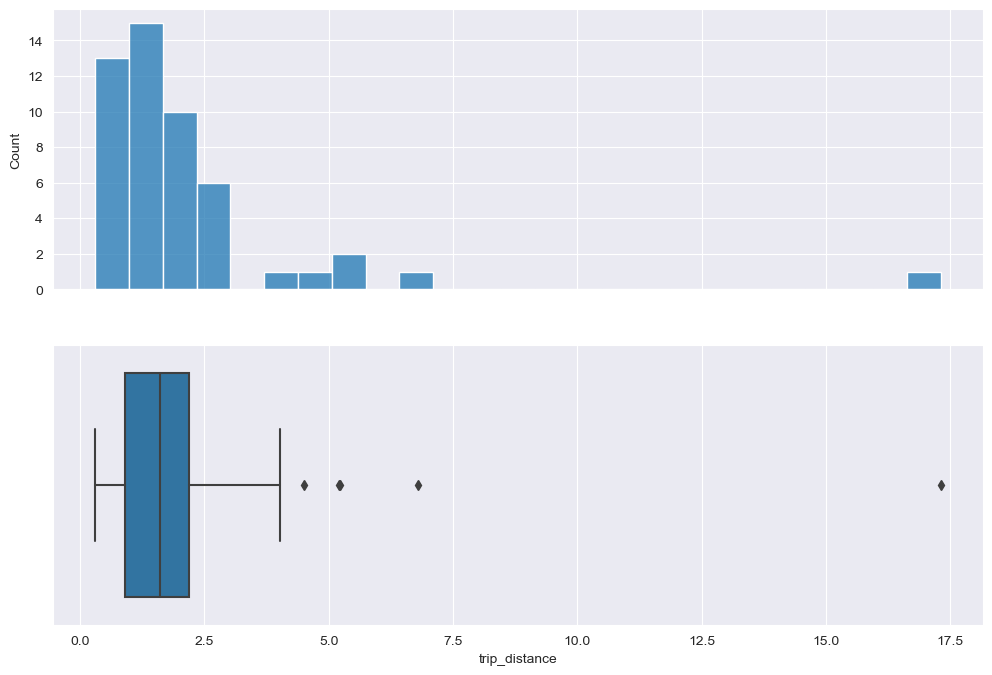

In [4]:
fig,ax = plt.subplots(2,1,figsize=(12,8),sharex=True)
sns.histplot(x=trip_distance_sample, ax=ax[0]);
sns.boxplot(x=trip_distance_sample, ax=ax[1]);

# Define the Sample Statistic

In [5]:
trip_distance_sample_xbar = trip_distance_sample.mean()
print(f'sample mean: {trip_distance_sample_xbar:0.2f}')

sample mean: 2.14


- Is this sample statistic a good approximation?

- Let's take more samples!

# Generate Samples and Plot Distribution of Sample Stat.

In [6]:
sample_means = []
for i in range(1000):
    sample_mean = df_taxi.trip_distance.sample(n=50,random_state=i).mean()
    sample_means.append(sample_mean)

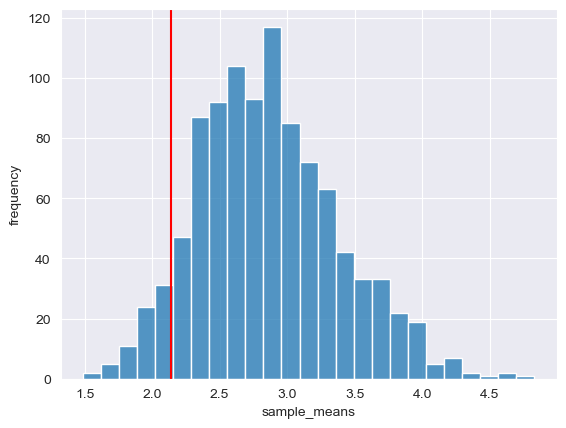

In [7]:
ax = sns.histplot(x=sample_means)
ax.set_xlabel('sample_means');
ax.set_ylabel('frequency');
ax.axvline(trip_distance_sample_xbar,color='red');

But what if we can't generate additional samples? **Bootstrap Confidence Intervals**

# Confidence Intervals
<br>

Typically we only have one sample from the population (experimental results, survey results, etc.)

In [8]:
n_trip = trip_distance_sample.shape[0]
n_trip

50

In [9]:
trip_distance_sample_xbar = trip_distance_sample.mean()
print(f'sample mean: {trip_distance_sample_xbar:0.2f}')

sample mean: 2.14


- What is the spread of our sample statistic?
- What other values would it be reasonable to observe?

# Plotting Confidence Intervals with Seaborn

/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/3208664956.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x=trip_distance_sample,


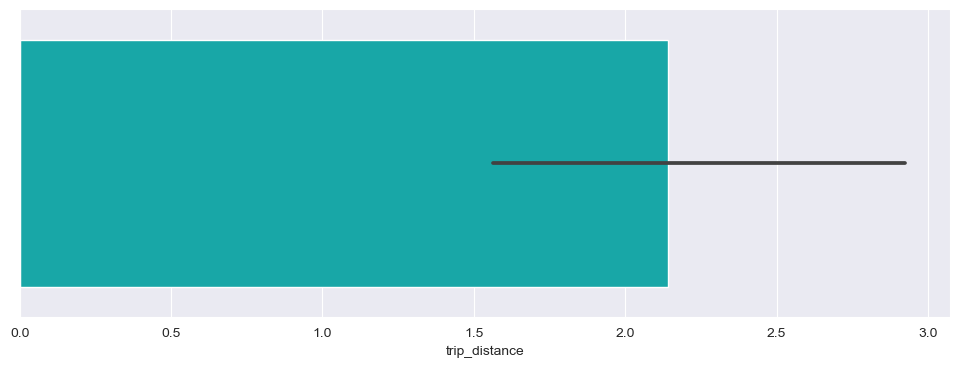

In [10]:
fig,ax = plt.subplots(1,1,figsize=(12,4))

sns.barplot(x=trip_distance_sample,
            estimator=np.mean, # default sample statistic
            ci=95,             # default 95% CI
            n_boot=1000,       # default number of bootstrap samples
            color='c',
           );

- How are these confidence intervals generated from only one sample?
- What does a 95% confidence interval mean?

# Generate Confidence Intervals
<br>

**Bootstrapping:** sampling with replacement

**Bootstrap Confidence Interval:** create confidence interval using bootstrap samples

1. draw a random sample of size $n$ from the data
1. record the sample statistic from this random sample
1. repeat 1 and 2 many times
1. for an $x$% CI, find the trim points to remove $\frac{1}{2}\left(1−\frac{x}{100}\right)$ of the data from both ends
1. those trim points are the endpoints of the the $x$% bootstrap CI

# 1. & 2. Draw a Random Sample and Record Statistic
<br>


In [11]:
# 1. draw a random sample with replacement
random_sample = trip_distance_sample.sample(
    n=trip_distance_sample.shape[0], # same size as number of observations (or frac=1)
    replace=True,                     # sample with replacement
    random_state=123                  # for reproducability
)
random_sample.head(3)

691    0.7
50     0.8
882    6.8
Name: trip_distance, dtype: float64

In [12]:
# 2. record sample statistic
sample_means = []
sample_means.append(random_sample.mean())
[x.round(2) for x in sample_means]

[1.82]

# 3. Repeat Many Times

In [13]:
# tqdm gives us a progress bar when looping
from tqdm.notebook import tqdm 

In [14]:
df_taxi.trip_distance.shape[0]

1000

In [15]:
# 3. repeat 1 and 2 many times
num_iterations = 100
sample_means = []

for i in tqdm(range(num_iterations)):
    # 1. draw a random sample of size *n* from the data
    random_sample = df_taxi.trip_distance.sample(n=df_taxi.trip_distance.shape[0], # or frac=1
                                                 replace=True,   # sample with replacement
                                                 random_state=i  # for reproducability
                                                )
    # 2. record the sample statistic from this random sample
    sample_means.append(random_sample.mean())
    
# convert into a numpy array
sample_means = np.array(sample_means)

sample_means[:10].round(2)

  0%|          | 0/100 [00:00<?, ?it/s]

array([2.98, 2.96, 3.02, 2.96, 3.01, 2.92, 2.74, 2.7 , 2.68, 2.82])

# Distribution of Sample Means?

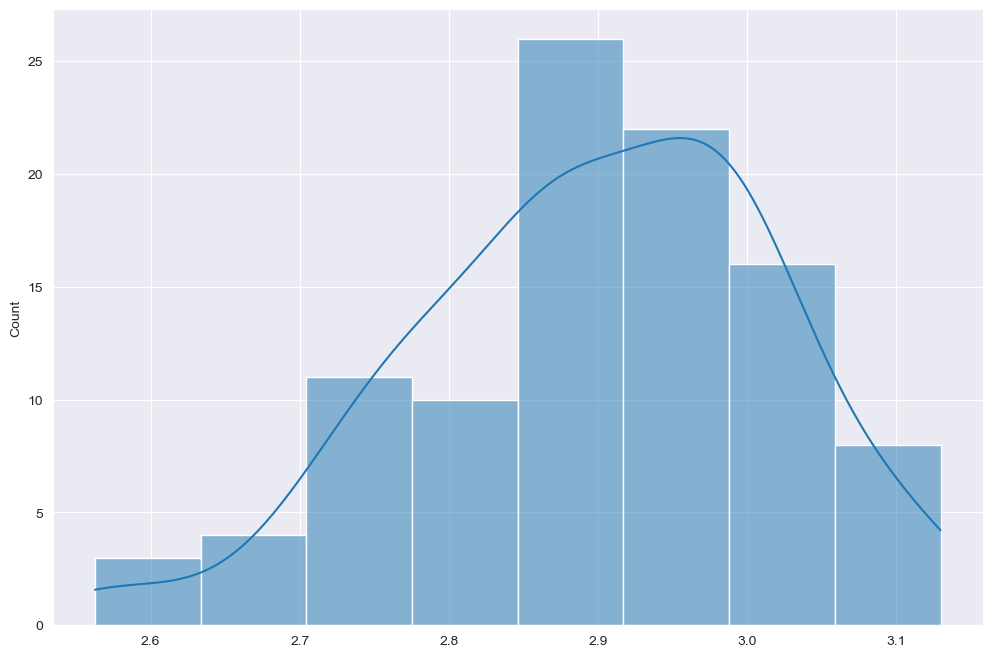

In [16]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.histplot(x=sample_means,kde=True);

- Between what two values do 95% of these samples fall?

# 4 & 5 Find CI Endpoints
<br>




In [17]:
# 4. For a 95% conf. int., trim off .5*(1-(95/100)) of the data from both ends

# calculate where to trim
trim = .5*(1-.95) * num_iterations

# find the closest integer
trim = int(np.round(trim))
trim

3

In [18]:
# for 1000 iterations and a 95% CI, we want to find the 25th value and (1000-25)th value

# 5. those trim points are the endpoints of the the x% Bootstrap CI

ci = np.sort(sample_means)[[trim,-trim-1]] # sort the array first!
ci.round(2)

array([2.68, 3.1 ])

# Plotting Distribution of Sample Means With CIs

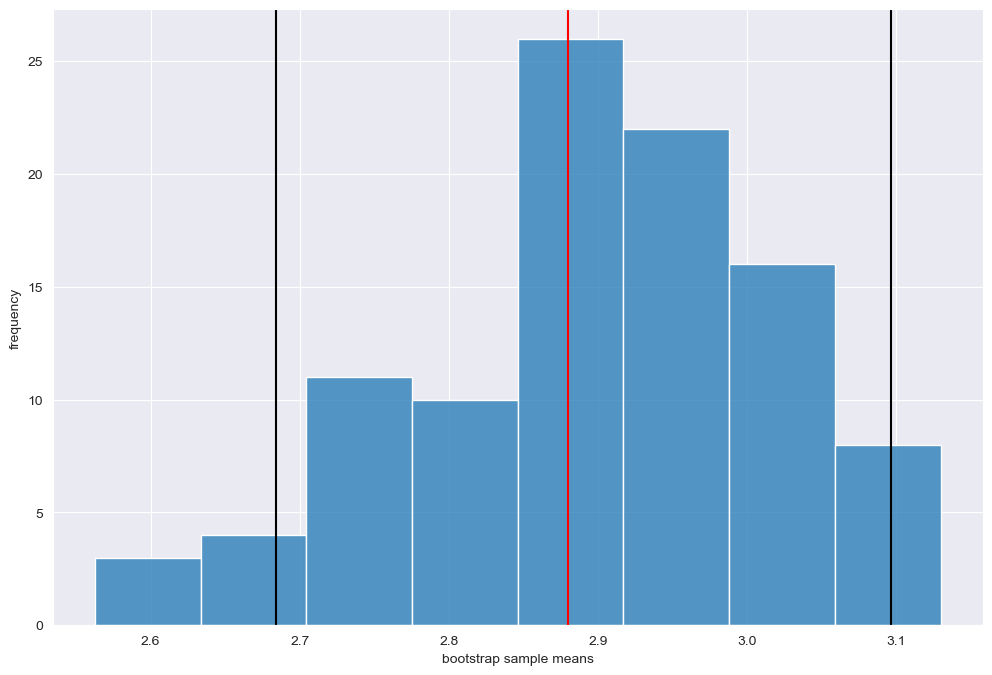

In [19]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(sample_means)
ax.axvline(df_taxi.trip_distance.mean(), color='r');
ax.axvline(ci[0],color='k');ax.axvline(ci[1],color='k')
ax.set_xlabel('bootstrap sample means');
ax.set_ylabel('frequency');

# Interpreting CIs
<br>

- **Does NOT tell us:** "the probability that the true value lies within that interval"

- **Tells us:** something about the variablity of this statistic

- **Tells us:** how confident we should be that our parameter lies in the interval


> If confidence intervals are constructed using a given confidence level from an infinite number of independent sample statistics, the proportion of those intervals that contain the true value of the parameter will be equal to the confidence level.

# Interpreting CIs

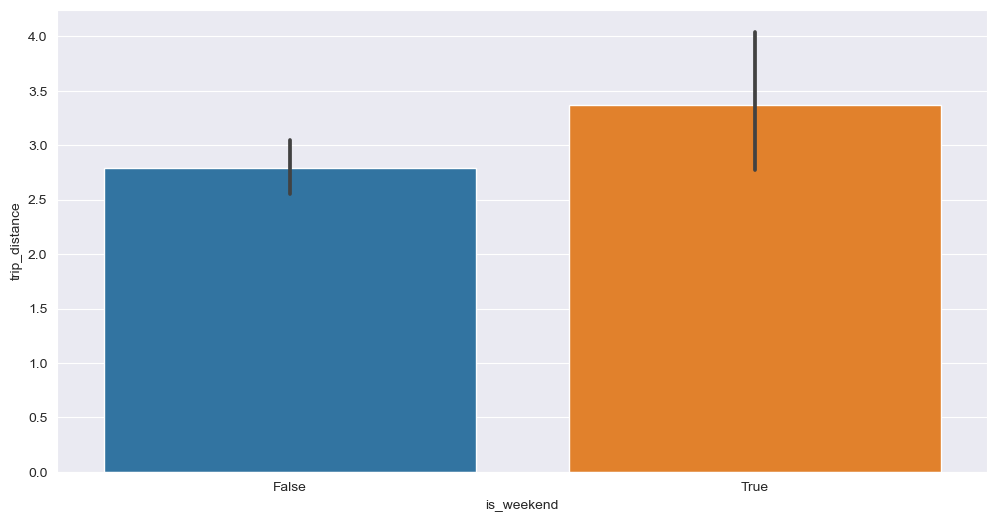

In [20]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.barplot(x='is_weekend',y='trip_distance',data=df_taxi);

<br>
<br>

# <center>Questions re CIs?</center>
<br>
<br>


# Hypothesis Testing
<br>

- Ex: Is the average trip longer on weekends compared to weekdays?
- Ex: Does one advertisement lead to more sales than another?
<br/>

- **Null Hypothesis:** $H_0$
 - the thing we're observing is happening due to random chance
 - there are no differences between two groups

- **Alternative Hypothesis:** $H_1$
 - the thing we're observing is happening not due to random chance
 - there is a difference between two groups

- Experiment: given data, do we **accept or reject** $H_0$?
 - Ex: can we say the difference between average trip on weekdays vs. weekends isn't random?


# Errors in Hypothesis Tests
<br>
<br>

<div align="center"><img src="./images/TypeI_TypeII1.jpg" width="800px"></div>

https://www.gilliganondata.com/wp-content/uploads/2009/08/TypeI_TypeII1.JPG

# Errors in Hypothesis Tests
<br>
<br>

<div align="center"><img src="https://flowingdata.com/wp-content/uploads/2014/05/Type-I-and-II-errors1-620x465.jpg" width="700px"></div>

https://flowingdata.com/wp-content/uploads/2014/05/Type-I-and-II-errors1-620x465.jpg

# Significance and Power
<br>
<br>

- $P\left(\text{reject } H_0 \mid H_0 \text{ true}\right)$ = **Significance** of test or **p-value** (Type I Error)
 - Probablity of saying **things aren't by chance when they are**
 - Ex: Saying trips on weekends are longer, when the difference *is* random
 - Ex: Saying Ad A was correlated with more sales, when the difference *is* random
<br>
<br>

- $P\left(\text{reject } H_0 \mid H_1 \text{ true}\right)$ = **Power** of test (1-Type II Error)
 - Probability of saying **things aren't by chance when they aren't**
 - Ex: Saying trips on weekends are longer, when the difference *is not* random
 - Ex: Saying Ad A was correlated with more sales, when the difference *is not* random

# Ex: Trip-Distance by Weekday vs. Weekend

- Question: Is the average trip_distance different on weekdays vs weekends?

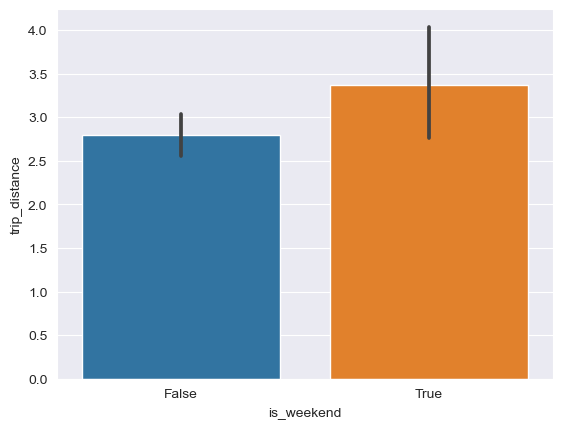

In [21]:
sns.barplot(x='is_weekend',y='trip_distance',data=df_taxi);

# Ex: Trip-Distance by Weekday vs. Weekend, Define the Metric
<br>


- **Metric:** the measure we're interested in
 - Ex: We're interested in a difference of means: Weekday - Weekend

In [22]:
mean_weekend = df_taxi.loc[df_taxi.is_weekend,'trip_distance'].mean()
mean_weekday = df_taxi.loc[~df_taxi.is_weekend,'trip_distance'].mean()
observed_trip_metric = mean_weekend-mean_weekday
print(f'observed metric: {observed_trip_metric.round(2)}')

observed metric: 0.58


- Is this surprising? Should we reject the null?
 - Assuming that $H_0$ is true, is this observation surprising?

# Permutation Test

- How do we generate additional samples of the difference in means? Resampling!
- Need to repeatedly split the data into two groups and take the difference in means
- One way to do this: combine, permute (reorder) and split

# Permutation Test
<br>

1. combine groups together (assume $H_0$ is true)
  
2. permute (reorder) observations

3. create new groups (same sizes as original groups)

4. calculate metric

5. repeat many times

6. see where our original observation falls in the distribution of sample statistics

#### Ex: Avg Trip-Distance on Weekday vs. Weekend, Permutation Test

In [23]:
# 0. get group sizes
n_weekend = df_taxi.is_weekend.sum()
n_weekday = (~df_taxi.is_weekend).sum()
print(f'{n_weekend=} {n_weekday=}')
assert n_weekday + n_weekend == df_taxi.shape[0]

n_weekend=150 n_weekday=850


In [24]:
# 1. combine groups together (assume H0 is true)
trip_distances = df_taxi.trip_distance
trip_distances[:2]

0    0.89
1    2.70
Name: trip_distance, dtype: float64

In [25]:
# 2. permute observations
permuted_trip_distances = trip_distances.sample(frac=1,replace=False,random_state=123)
permuted_trip_distances[:2]

/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/3380519961.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  permuted_trip_distances[:2]


131    2.13
203    2.15
Name: trip_distance, dtype: float64

In [26]:
# 3. create new groups
rand_mean_weekend = permuted_trip_distances[:n_weekend].mean()
rand_mean_weekday = permuted_trip_distances[n_weekend:].mean()

# 4. calculate metric
rand_mean_trip_diff = (rand_mean_weekend - rand_mean_weekday)
print('{:.2f}'.format(rand_mean_trip_diff))

-0.03


/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/3058261422.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rand_mean_weekend = permuted_trip_distances[:n_weekend].mean()
/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/3058261422.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rand_mean_weekday = permuted_trip_distances[n_weekend:].mean()


# Ex: Trip-Distance, Permutation Test Continued

In [27]:
# 5. repeat many times
rand_mean_trip_diffs = []
iterations = 10_000

for i in tqdm(range(iterations)):
    permuted_trip_distances = trip_distances.sample(frac=1,replace=False,random_state=i)
    
    rand_mean_weekend = permuted_trip_distances[:n_weekend].mean()
    rand_mean_weekday = permuted_trip_distances[n_weekend:].mean()
    
    rand_mean_trip_diffs.append(rand_mean_weekend - rand_mean_weekday)
    
rand_mean_trip_diffs = np.array(rand_mean_trip_diffs) # convert list to numpy array
    
rand_mean_trip_diffs[:5].round(2)

  0%|          | 0/10000 [00:00<?, ?it/s]

/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/1315191553.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rand_mean_weekend = permuted_trip_distances[:n_weekend].mean()
/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/1315191553.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rand_mean_weekday = permuted_trip_distances[n_weekend:].mean()


array([-0.49, -0.21,  0.58, -0.09, -0.37])

# Ex: Trip-Distance, Permutation Test Continued

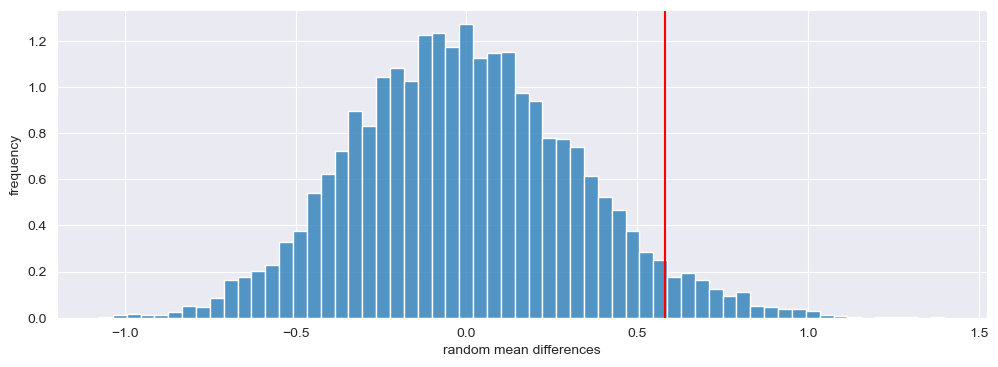

In [28]:
# 6. see where our original observation falls
fig,ax = plt.subplots(1,1,figsize=(12,4))
ax = sns.histplot(x=rand_mean_trip_diffs, stat='density')
ax.set_xlabel('random mean differences');ax.set_ylabel('frequency');
ax.axvline(observed_trip_metric, color='r');

- This looks like a normal distribution?
- Why would that be?
- How can we turn this into a Standard Normal distribution...

# Aside: Central Limit Theorem

If all samples are randomly drawn from the same sample population:

For reasonably large samples (usually $n \ge 30$), the distribution of sample mean $\bar{x}$ is normal regardless of the distribution of $X$.

The sampling distribution of $\bar{x}$ becomes approximately normal as the the sample size $n$ gets large.

Ex: 
- $X$ = trip_distance
- $\bar{x}$ = mean trip_distance
- $n$ = 50

# Aside: What is Normal?

distribution defined by mean ($\mu$) and standard deviation ($\sigma$)


$N(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma}}$


**PDF (Probability Density Function):** 
- function of a continuous random variable that provides a relative likelihood of seeing a particular sample of a random variable.

# Aside: Properties of a Normal Distribution
<br>
<br>

<div align="center"><img src="https://miro.medium.com/max/700/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width="1000"></div>

https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2

# Aside: Scipy

- Routines for numerical integration, interpolation, optimization, linear algebra, and **statistics**.
- Useful for sampling from random distributions and equation based testing
<br>
<br>

<div align="center"><img src="https://www.fullstackpython.com/img/logos/scipy.png" width="800px"></div>

In [29]:
import scipy as sp

# Aside: Plotting a Standard Normal Distribution

- **Standard Normal:** μ=0, σ=1
- Often referred to as $Z$

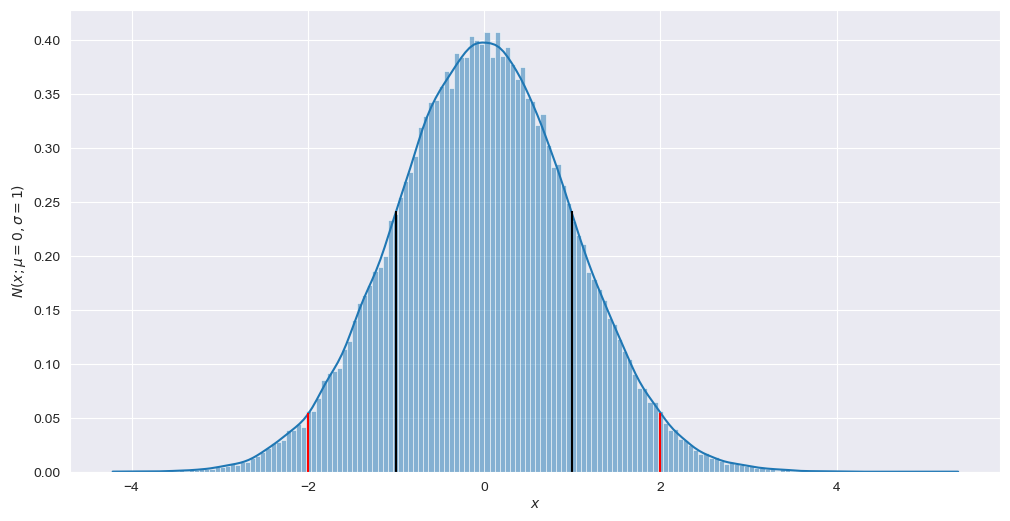

In [30]:
x = np.random.normal(0,1,size=100_000)                       # generate many random samples
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.histplot(x=x,stat='density',kde=True);              # using density to normalize bin counts
ax.set_xlabel('$x$');ax.set_ylabel('$N(x;\mu=0,\sigma=1)$'); # using latex in labels
ax.vlines([-1,1],0,sp.stats.norm.pdf(1), colors='k');        # 1 standard deviation
ax.vlines([-2,2],0,sp.stats.norm.pdf(2), colors='r');        # 2 standard deviations

# Normalization: z-score

Convert our distribution to an approximation of standard normal

1. shift mean to 0
2. transform to standard deviation of 1

<center>$\Large z = \frac{x - \bar{x}}{s}$</center>


In [31]:
rand_mean_trip_diffs_xbar = np.mean(rand_mean_trip_diffs)
rand_mean_trip_diffs_s = np.std(rand_mean_trip_diffs)

rand_mean_trip_zscores = (rand_mean_trip_diffs - rand_mean_trip_diffs_xbar) / rand_mean_trip_diffs_s
list(zip(rand_mean_trip_diffs[:3].round(2),rand_mean_trip_zscores[:3].round(2)))

[(-0.49, -1.47), (-0.21, -0.64), (0.58, 1.77)]

In [32]:
observed_trip_metric_zscore =  (observed_trip_metric - rand_mean_trip_diffs_xbar) / rand_mean_trip_diffs_s
observed_trip_metric.round(2),observed_trip_metric_zscore.round(2)

(0.58, 1.76)

# Ex: Trip-Distance, Permutation Test Continued

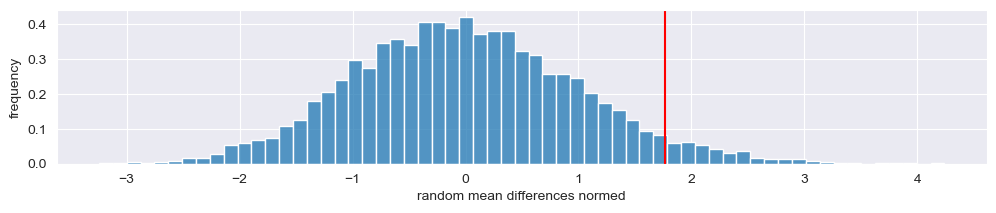

In [33]:
# 6. see where our original observation falls (normalized)
fig,ax = plt.subplots(1,1,figsize=(12,2))
ax = sns.histplot(rand_mean_trip_zscores, stat='density')
ax.set_xlabel('random mean differences normed');ax.set_ylabel('frequency');
ax.axvline(observed_trip_metric_zscore,color='r');

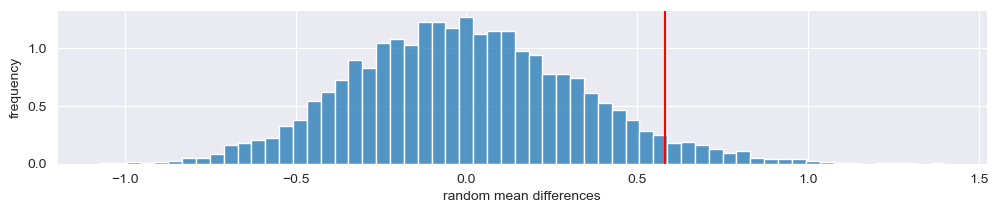

In [34]:
# Compared to our original distribution
fig,ax = plt.subplots(1,1,figsize=(12,2))
ax = sns.histplot(x=rand_mean_trip_diffs, stat='density')
ax.set_xlabel('random mean differences');ax.set_ylabel('frequency');
ax.axvline(observed_trip_metric, color='r');

# Why Use Permutation Tests?
<br>

- data can be numeric or boolean (ex. temperature, conversion, etc)

- group sizes can be different

- assumptions about normally distributed data are not needed (with many permutations)

# A/B Tests
<br>


- Do one of two treatments produce superior results?
 - testing two prices to determine which generates more profit
 - testing two web headlines to determine which produces more clicks
 - testing two advertisements to see which produces more conversions

- Often Used Test Statistics
 - difference in means
 - difference in counts

# Ex: Webpages and Sales
<br>

- Question: Which webpage leads to more sales?

- Potential Issue: what if sales are large but infrequent?

- **Proxy Variable:** stand in for true value of interest
 - Ex: Assume 'time on page' is correlated with sales

In [35]:
session_times = pd.read_csv('../data/web_page_data.csv')
print(session_times.shape)

session_times.head(3)

(36, 2)


,Page,Time
0,Page A,12.6
1,Page B,151.7
2,Page A,21.0


# Ex: Webpages and Sales

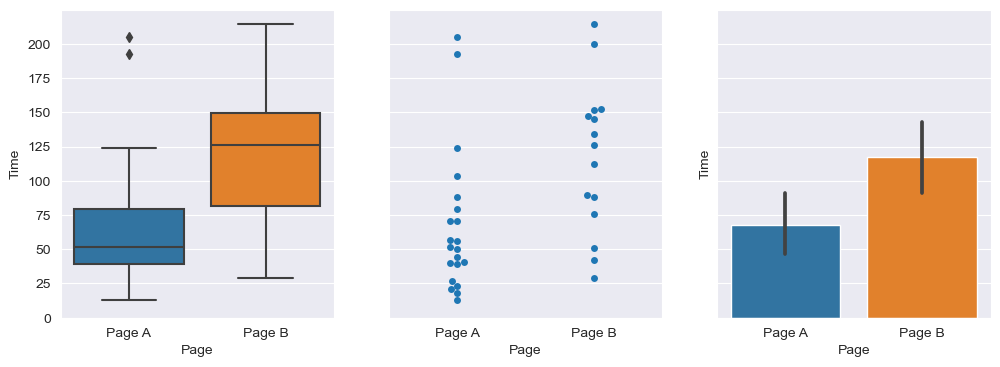

In [36]:
fig,ax = plt.subplots(1,3,figsize=(12,4),sharey=True)
sns.boxplot(x='Page',y='Time',data=session_times,ax=ax[0]);
sns.swarmplot(x='Page',y='Time',data=session_times,ax=ax[1]);
sns.barplot(x='Page',y='Time',data=session_times,ax=ax[2]);

# Ex: Webpages and Sales, Define the Metric
<br>


- **Metric:** the measure we're interested in
 - Ex: We're interested in a difference of means (Page A - Page B)

In [37]:
mean_a = session_times.loc[session_times.Page == 'Page A','Time'].mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
observed_ad_metric = mean_a-mean_b
print('observed metric: {:0.2f}'.format(observed_ad_metric))

observed metric: -49.77


# Ex: Websites and Sales, Permutation Test

In [38]:
# 0. get group sizes
n_a = (session_times.Page == 'Page A').sum()
n_b = session_times.shape[0] - n_a
print(f'{n_a=} {n_b=}')

n_a=21 n_b=15


In [39]:
# 1. combine groups together (assume H0 is true)
session_times.Time[:2]

0     12.6
1    151.7
Name: Time, dtype: float64

In [40]:
# 2. permute observations
session_times_permuted = session_times.Time.sample(frac=1,replace=False,random_state=123)
session_times_permuted[:2]

/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/1235933868.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  session_times_permuted[:2]


6    50.5
8    79.2
Name: Time, dtype: float64

In [41]:
# 3. create new groups
rand_mean_a = session_times_permuted[:n_a].mean()
rand_mean_b = session_times_permuted[n_a:].mean()

# 4. calculate metric
rand_mean_ad_diff = (rand_mean_a - rand_mean_b)
print('{:.2f}'.format(rand_mean_ad_diff))

11.89


/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/1001128447.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rand_mean_a = session_times_permuted[:n_a].mean()
/var/folders/78/vhnqkq8n45dd4gj4f5qx8yb00000gn/T/ipykernel_21770/1001128447.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  rand_mean_b = session_times_permuted[n_a:].mean()


# Ex: Websites and Sales, Permutation Test Continued

In [42]:
# 5. repeat many times
rand_mean_ad_diffs = []
iterations = 10_000

for i in tqdm(range(iterations)):
    session_times_permuted = session_times.Time.sample(frac=1,replace=False,random_state=i)
    
    rand_mean_a = session_times_permuted.iloc[:n_a].mean()
    rand_mean_b = session_times_permuted.iloc[n_a:].mean()
    
    rand_mean_ad_diffs.append(rand_mean_a - rand_mean_b)

rand_mean_ad_diffs = np.array(rand_mean_ad_diffs)
rand_mean_ad_diffs[:5].round(2)

  0%|          | 0/10000 [00:00<?, ?it/s]

array([  9.79, -13.71, -15.83,  34.99,  -4.67])

# Ex: Websites and Sales, Permutation Test Continued

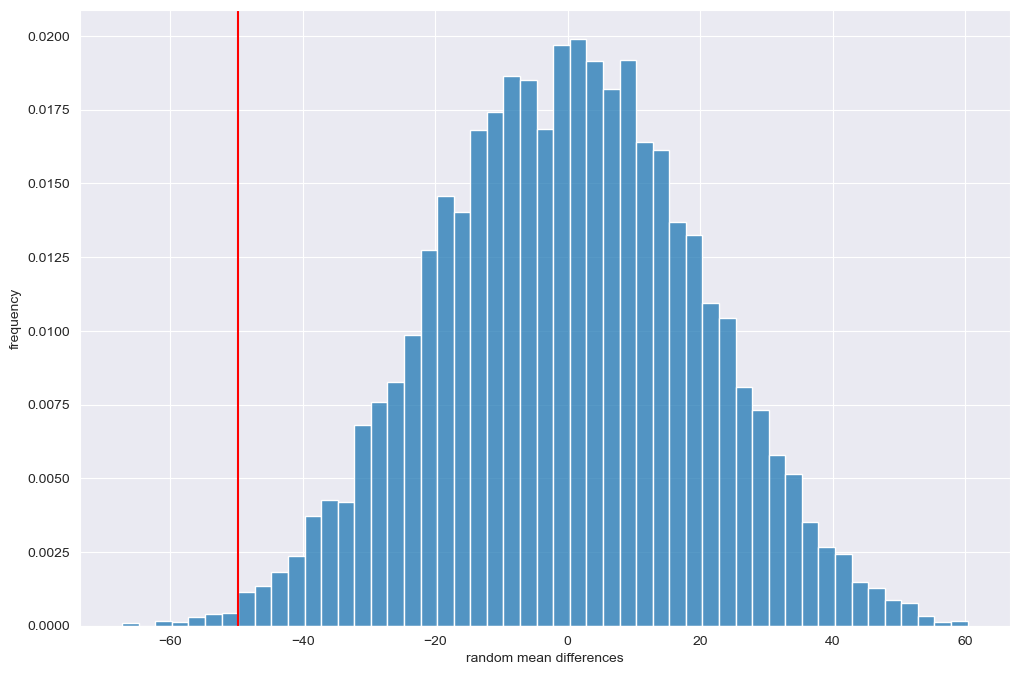

In [43]:
# 6. see where our original observation falls
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(x=rand_mean_ad_diffs, stat='density')
ax.set_xlabel('random mean differences');ax.set_ylabel('frequency');
ax.axvline(observed_ad_metric, color='r');

# Ex: Websites and Sales, Permutation Test Continued


In [44]:
# Normalize our values
rand_mean_ad_diffs_xbar = np.mean(rand_mean_ad_diffs)
rand_mean_ad_diffs_s    = np.std(rand_mean_ad_diffs)

rand_mean_ad_zscores = (rand_mean_ad_diffs - rand_mean_ad_diffs_xbar) / rand_mean_ad_diffs_s
list(zip(rand_mean_ad_diffs[:3].round(2),rand_mean_ad_zscores[:3].round(2)))

[(9.79, 0.5), (-13.71, -0.69), (-15.83, -0.8)]

In [45]:
observed_ad_metric_zscore =  (observed_ad_metric - rand_mean_ad_diffs_xbar) / rand_mean_ad_diffs_s
observed_ad_metric.round(2),observed_ad_metric_zscore.round(2)

(-49.77, -2.52)

# Ex: Websites and Sales, Permutation Test Continued

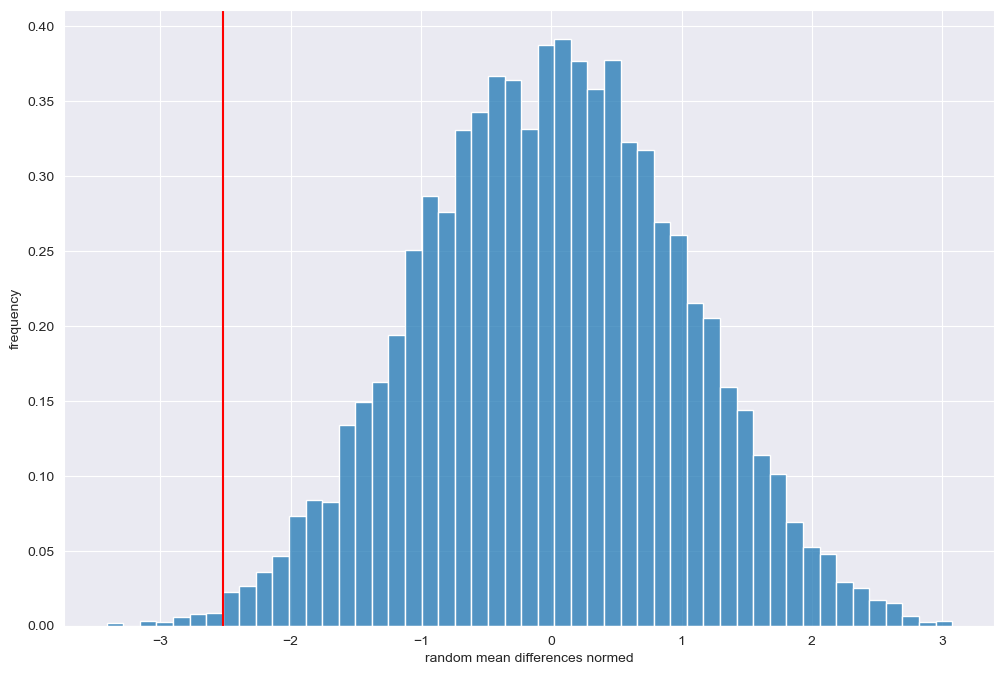

In [46]:
# 6. see where our original observation falls (normalized)
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(rand_mean_ad_zscores, stat='density')
ax.set_xlabel('random mean differences normed');ax.set_ylabel('frequency');
ax.axvline(observed_ad_metric_zscore,color='r');

# How sure are we?
<br>

- **p-value**

> The probability of finding the observed result, or one more extreme, when the null hypothesis ($H_0$) is true.

- **does mean** : $P\left(\text{data} \mid H_0 \text{ is true}\right)$



- **does NOT mean** : $P\left(H_0 \text{ is not true} \mid \text{data}\right)$



- Our question about significance becomes:

> "How often did we see a value as or more extreme than our observed metric?"

# One-Tailed vs Two-Tailed Tests
<br>
<br>

<div align="center"><img src="http://www.fao.org/3/X6831E/X6831E120.gif", width="800px"></div>
    
https://towardsdatascience.com/one-tailed-or-two-tailed-test-that-is-the-question-1283387f631c?gi=9568e456cd13

# Choosing One-Tailed vs Two-Tailed
<br>

- Do we have a strong reason for a one-directional question? One-Tailed
 - Ex: $H_0$ is "difference is less than or equal to 0"
 - Need a strong reason


- Otherwise? Two-tailed
 - Ex: $H_0$ is "there is no real difference between groups"
 - More conservative
 - Usually a better choice

# Calculating p for Two-Tailed Test

In [47]:
# find absolute values greater than our observed_metric
ad_gt = np.abs(rand_mean_ad_diffs) >= np.abs(observed_ad_metric)

In [48]:
# how many are greater than or equal to?
num_ad_gt = ad_gt.sum()

# proportion of total that are as or more extreme
p = num_ad_gt / len(rand_mean_ad_diffs)
print(f'{p = :}')

p = 0.0078


# One-Tailed Test Example

In [49]:
# one-tailed test
sum(np.array(rand_mean_ad_diffs) <= observed_ad_metric) / len(rand_mean_ad_diffs)

0.0037

Note that this is less than our Two-Tailed value!

In [50]:
# two-tailed test
sum(np.abs(rand_mean_ad_diffs) >= np.abs(observed_ad_metric)) / len(rand_mean_ad_diffs)

0.0078

# Equation Based Hypothesis Test: t-Test 
<br>

- based on the Student-t distribution
- more involved to describe
- works for numeric data (can't use it for the next example)

In [51]:
# using our session_times example
t = sp.stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time.values,
                       session_times[session_times.Page == 'Page B'].Time.values,
                       equal_var=False)
print(f'{t.pvalue = :0.3f}')

t.pvalue = 0.010


- close to the 0.008 value we found via permutation test

# Choosing $\alpha$
<br>

- **alpha** ($\alpha$): significance level
 - What we compare our p-value to
 - Best to choose this before calculating metrics
 - Probability of rejecting the null when it is true (Type I Error)

- Common values:
 - .1 (Error 1 out of 10 times)
 - .05 (Error 1 out of 20 times)
 - .01 (Error 1 out of 100 times)


- Should depend on how bad a Type I (False Positive) Error is

# Another Example: Price vs Conversion
<br>


- Does Price A lead to higher conversions than Price B?
- **Conversion:** Turning a visit into a sale

- $H_0$: conversions for Price A ≤ conversions for Price B 
 - Price A does not lead to more conversions
 
- $H_1$: conversions for Price A > conversions for Price B 
 - Price A leads to more conversions

In [52]:
# Counts of observations
df = pd.DataFrame({'Price A':[200,23539],
                   'Price B':[182,22406]},
                   index=['Conversion','No Conversion'])
df

,Price A,Price B
Conversion,200,182
No Conversion,23539,22406


# Another Example: Price vs Conversion Continued

- Metric of Interest?
 - difference in percent conversion
 

In [53]:
pct_conv = df.loc['Conversion'] / df.sum(axis=0) * 100
pct_conv.round(2)

Price A    0.84
Price B    0.81
dtype: float64

In [54]:
diff_pct_conv = pct_conv['Price A'] - pct_conv['Price B']
print(f'{diff_pct_conv.round(3)}%')

0.037%


# Another Example: Price vs Conversion Continued
<br>


- First: Choose our $\alpha$: 0.05

- Reminder of Permutation Test:
 0. get group sizes
 1. combine groups together
 2. permute observations
 3. create two new groups (same sizes as originals)
 4. calculate metric
 5. repeat many times
 6. see where our original observation falls

# Another Example: Price vs Conversion Continued
<br>


- What are our samples?
 - 1 = Conversion
 - 0 = No conversion
 
- How many samples are there?

In [55]:
n = df.sum().sum()
n

46327

# Another Example: Price vs Conversion Continued
<br>


- Turning counts into samples

In [56]:
n_conversion = df.loc['Conversion'].sum()
n_conversion


382

In [57]:
conv_samples = np.zeros(n)
conv_samples[:n_conversion] = 1

assert sum(conv_samples) == n_conversion

In [58]:
conv_samples

array([1., 1., 1., ..., 0., 0., 0.])

# Another Example: Price vs Conversion Continued
<br>



In [59]:
df

,Price A,Price B
Conversion,200,182
No Conversion,23539,22406


In [60]:
n_pricea, n_priceb = df.sum(axis=0)
print(f'{n_pricea=} {n_priceb=} {n=}')

assert n_pricea + n_priceb == n

n_pricea=23739 n_priceb=22588 n=46327


In [61]:
np.random.seed(123)
rand_conv_diffs = []
for i in tqdm(range(1000)):
    conv_permuted = np.random.permutation(conv_samples)
    rand_conv_a = sum(conv_permuted[:n_pricea]) / n_pricea
    rand_conv_b = sum(conv_permuted[n_pricea:]) / n_priceb
    rand_conv_diffs.append(100 * (rand_conv_a - rand_conv_b))

  0%|          | 0/1000 [00:00<?, ?it/s]

# Another Example: Price vs Conversion Continued
<br>


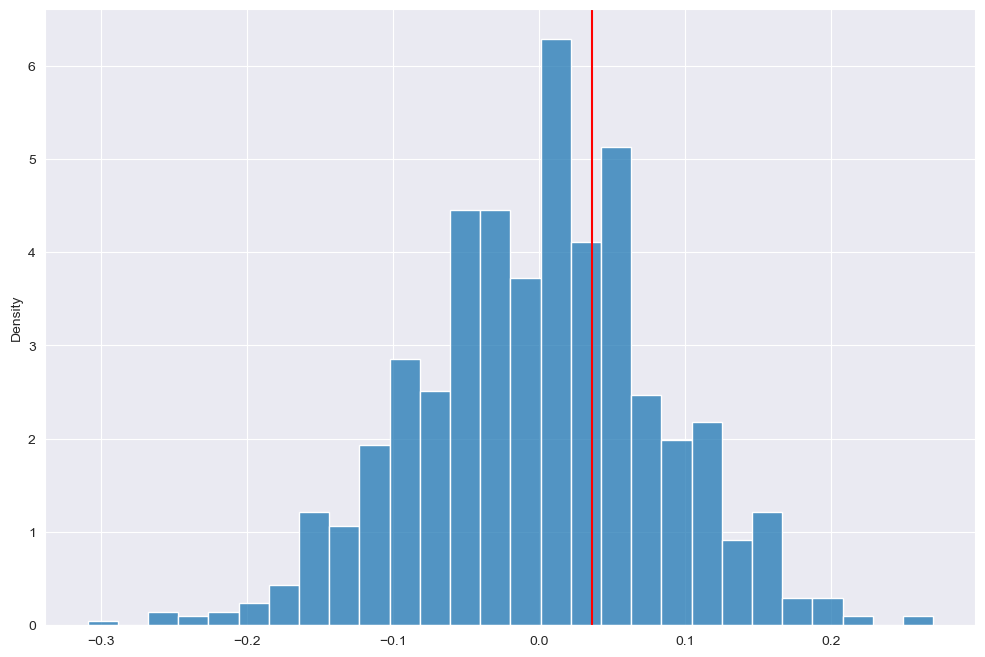

In [62]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(x=rand_conv_diffs, stat='density')
ax.axvline(diff_pct_conv,color='r');

In [63]:
# calculate a two-tailed p-value
sum(np.array(rand_conv_diffs) >= diff_pct_conv) / len(rand_conv_diffs)

0.35

# Equation Based Proportion Test
<br>


In [64]:
from statsmodels.stats.proportion import proportions_ztest

z,p = proportions_ztest(df.loc['Conversion'].values,
                        df.sum(),
                        alternative='two-sided')
print(f'{p = :0.3f}')

p = 0.662


# Statistically Significant?
<br>

[**The ASA Statement on p-Values: Context, Process, and Purpose**](https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108) Wasserstein &amp; Lazar, 09 Jun 2016]


- Don’t base your conclusions solely on whether an association or effect was found to be “statistically significant” (i.e., the p-value passed some arbitrary threshold such as p &lt; 0.05).


- Don’t believe an association/effect **exists** just because it **was statistically significant**.


- Don’t believe an association/effect **is absent** just because it **was not stat. significant**.


- Don’t believe that your p-value:
    1. gives the **probability that chance alone** produced the observed association/effect or
    2. the probability that your **test hypothesis is true**.]


- Don’t conclude anything about **scientific or practical importance** based on statistical significance (or lack thereof).


# Statistically Significant?
<br>


- [**Moving to a World Beyond “p &lt; 0.05”**](https://www.tandfonline.com/doi/full/10.1080/00031305.2019.1583913) Wasserstein, Schirm &amp; Lazar, 20 Mar 2019
 - Try to avoid “Statistically Significant”

 - “**A**ccept uncertainty. Be **t**houghtful, **o**pen, and **m**odest.” Remember “**ATOM**.”

- ATOM
 - **A:** Seek better measures, more sensitive designs, larger samples
<br>
<br>
 - **T:** Begin with clearly expressed objectives
 - **T:** Ask "What are the practical implications?"
<br>
<br>
 - **O:**: Be open/transparent in analysis and communication
<br>
<br>
 - **M:** Accept limititaions, assumptions, reproduction, recognizing differences in stakes

# Issues with Multiple Testing
<br>

- p-hacking: keep trying comparisons till you find something that works


- multiple tests: the more tests you run, the more likely a Type 1 Error


- One simple solution: 
 - **Bonferonni correction** $\frac{\alpha}{m}$ where $m$ is the number of tests

# Comparing More Than 2 Groups

- ANOVA
 - need more stats than we have time for
        
- Multi-Armed Bandit (MAB)
 - can compare many distributions
 - don't need to make assumptions about underlying distributions
 - can also be used for early stopping of experiment

# Multi-Armed Bandit
<br>

<div align="center"><img src="https://cdn.psychologytoday.com/sites/default/files/field_blog_entry_images/2019-07/casino-3491252_1920.jpg" width="600px"></div>


**Question:** Which arm should we pull?

# Greedy MAB

**greedy:** do something simple that heads towards the goal


1. pull arm with highest payout


But what if there's a better choice, we just haven't seen it yet?

# Exploration Vs Exploitation
<br>

- **Exploration:** There might be a better arm
 - keep choosing different arms randomly
<br>
<br>

- **Exploitation:** We want to make use of the best
 - keep pulling the best arm
 
 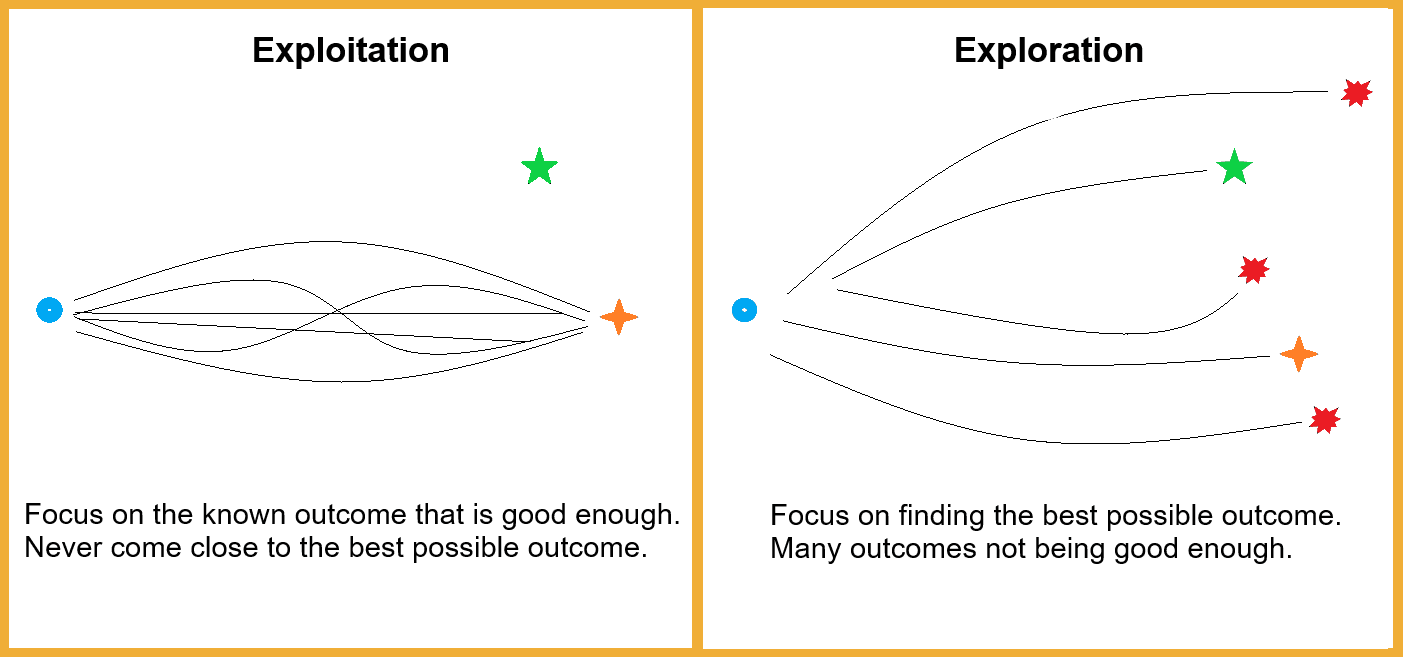

# $\epsilon$-Greedy MAB
<br>
- choose a small epsilon ($\epsilon$) between 0 and 1
<br>

1. generate random number between 0 and 1
2. if < ϵ, choose arm randomly
3. if ≥ ϵ, choose best arm
4. GOTO 1

<br>
- larger $\epsilon$ -> more exploration

# MAB Example
<br>

- We have three ads
- We don't know how often each will lead to a response
- We need to decide which ad to add to each page request

In [65]:
# creating three ads (distributions) with unknown response rate
np.random.seed(13)
ad_A = sp.stats.bernoulli(p=np.random.rand())
ad_B = sp.stats.bernoulli(p=np.random.rand())
ad_C = sp.stats.bernoulli(p=np.random.rand())

- We'll use an $\epsilon$-greedy MAB to decide which ad to show

In [66]:
# epsilon probability
epsilon = 0.40

# MAB Example Continued
<br>

- Rounds 1,2,3
 - Pull each arm once

In [67]:
rewards_A = [ad_A.rvs()]

rewards_B = [ad_B.rvs()]

rewards_C = [ad_C.rvs()]

rewards_A,rewards_B,rewards_C

([0], [1], [1])

# MAB Example Continued
<br>

- Round 3
 - With probability $1-\epsilon$, choose the best arm (randomly if tied)

In [68]:
be_greedy = np.random.rand() > epsilon
be_greedy

True

In [69]:
best_arms = ['B','C']
best_arms[np.random.randint(2)]
# np.random.randint(2) randomly choose 0 or 1 

'B'

In [70]:
rewards_B.append(ad_B.rvs())

rewards_A,rewards_B,rewards_C

([0], [1, 1], [1])

# MAB Example Continued
<br>

In [71]:
def mab(arms = [],rewards = [],arm_names = [],epsilon=0.4):
    n_arms = len(arms)
#     if not rewards:
#         for i in range(n_arms):
#             pulls.append(list)
    be_greedy = np.random.rand() > epsilon
    if not be_greedy: # randomly choose
        arm_idx = np.random.randint(0,n_arms)
        rewards[arm_idx].append(arms[arm_idx].rvs())
    else: # be greedy
        reward_means = np.array([sum(x)/len(x) for x in rewards])
        best_arms = np.where(reward_means == np.amax(reward_means))[0]
        arm_idx = best_arms[np.random.randint(0,best_arms.shape[0])]
        rewards[arm_idx].append(arms[arm_idx].rvs())
    return rewards, be_greedy, arm_names[arm_idx]

def print_mab_results(be_greedy,choice,rewards):
    print(f'greedy:{str(be_greedy):5s} choice:{choice} => '+
          f"[{':'.join([str(round(sum(x)/len(x),1)) for x in rewards])}] "+
          f"| {','.join([str(x).ljust(20,' ') for x in rewards])}")

# MAB Example Continued
<br>

- Round 4

In [72]:
arms = [ad_A,ad_B,ad_C]
rewards = [rewards_A,rewards_B,rewards_C]
labels = ['A','B','C']

rewards, be_greedy, choice = mab(arms,rewards,labels,epsilon)

print_mab_results(be_greedy,choice,rewards)

greedy:False choice:C => [0.0:1.0:1.0] | [0]                 ,[1, 1]              ,[1, 1]              


# MAB Example Continued
<br>

In [73]:
for i in range(10):
    rewards, be_greedy, choice = mab(arms,rewards,labels,epsilon)
    print_mab_results(be_greedy,choice,rewards)

greedy:False choice:A => [0.5:1.0:1.0] | [0, 1]              ,[1, 1]              ,[1, 1]              
greedy:True  choice:B => [0.5:0.7:1.0] | [0, 1]              ,[1, 1, 0]           ,[1, 1]              
greedy:False choice:A => [0.3:0.7:1.0] | [0, 1, 0]           ,[1, 1, 0]           ,[1, 1]              
greedy:True  choice:C => [0.3:0.7:1.0] | [0, 1, 0]           ,[1, 1, 0]           ,[1, 1, 1]           
greedy:True  choice:C => [0.3:0.7:0.8] | [0, 1, 0]           ,[1, 1, 0]           ,[1, 1, 1, 0]        
greedy:True  choice:C => [0.3:0.7:0.8] | [0, 1, 0]           ,[1, 1, 0]           ,[1, 1, 1, 0, 1]     
greedy:True  choice:C => [0.3:0.7:0.8] | [0, 1, 0]           ,[1, 1, 0]           ,[1, 1, 1, 0, 1, 1]  
greedy:False choice:B => [0.3:0.5:0.8] | [0, 1, 0]           ,[1, 1, 0, 0]        ,[1, 1, 1, 0, 1, 1]  
greedy:True  choice:C => [0.3:0.5:0.9] | [0, 1, 0]           ,[1, 1, 0, 0]        ,[1, 1, 1, 0, 1, 1, 1]
greedy:False choice:C => [0.3:0.5:0.9] | [0, 1, 0]           ,[

# MAB Example Continued
<br>

- Which arm seems best?

In [74]:
rates = ' '.join([f"{label}:{np.mean(reward).round(1)}" for label,reward in zip(labels,rewards)])
print(f"conversion rates: {rates}")

conversion rates: A:0.3 B:0.5 C:0.9


- Did we pick the best one?

In [75]:
ground_truth_rates = ' '.join([f"{label}:{arm.pmf(1).round(1)}" for label,arm in zip(labels,arms)])
print(f'ground truth: {ground_truth_rates}')

ground truth: A:0.8 B:0.2 C:0.8


# MAB Variations
<br>


- Thompson's Sampling: uses Baysian approach

- UCB1: maximize expected reward using Upper Confidence Bounds

- ...


<br>
<br>

# <center>Questions?</center>
<br>
<br>